In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


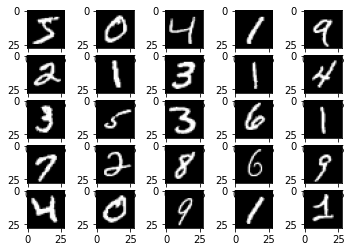

In [4]:
for i in range(25):
	plt.subplot(5, 5, i + 1)
	plt.imshow(X_train[i], cmap = 'gray')
plt.show()

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding = 'valid'))
model.add(Conv2D(64, (5, 5), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2), padding = 'valid'))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [8]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 1000, validation_split = 0.10)

Epoch 1/10
54/54 [==============================] - 6s 75ms/step - loss: 0.5367 - accuracy: 0.8376 - val_loss: 0.1518 - val_accuracy: 0.9570
Epoch 2/10
54/54 [==============================] - 4s 77ms/step - loss: 0.1522 - accuracy: 0.9555 - val_loss: 0.1007 - val_accuracy: 0.9747
Epoch 3/10
54/54 [==============================] - 4s 79ms/step - loss: 0.1086 - accuracy: 0.9686 - val_loss: 0.0827 - val_accuracy: 0.9783
Epoch 4/10
54/54 [==============================] - 4s 75ms/step - loss: 0.0863 - accuracy: 0.9749 - val_loss: 0.0743 - val_accuracy: 0.9790
Epoch 5/10
54/54 [==============================] - 4s 71ms/step - loss: 0.0725 - accuracy: 0.9791 - val_loss: 0.0620 - val_accuracy: 0.9827
Epoch 6/10
54/54 [==============================] - 4s 71ms/step - loss: 0.0611 - accuracy: 0.9829 - val_loss: 0.0564 - val_accuracy: 0.9847
Epoch 7/10
54/54 [==============================] - 4s 70ms/step - loss: 0.0560 - accuracy: 0.9839 - val_loss: 0.0572 - val_accuracy: 0.9848
Epoch 8/10
54

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size = 1000)
print(f'Testing set loss: {loss}')
print(f'Testing set accuracy: {accuracy}')

10/10 [==============================] - 0s 25ms/step - loss: 0.0417 - accuracy: 0.9870
Testing set loss: 0.041676342487335205
Testing set accuracy: 0.9869999885559082


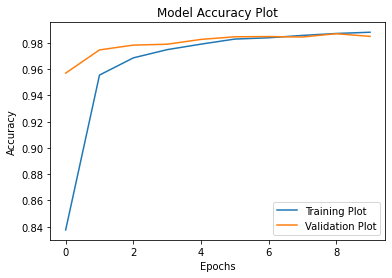

In [11]:
plt.plot(history.history['accuracy'], label = 'Training Plot')
plt.plot(history.history['val_accuracy'], label = 'Validation Plot')
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

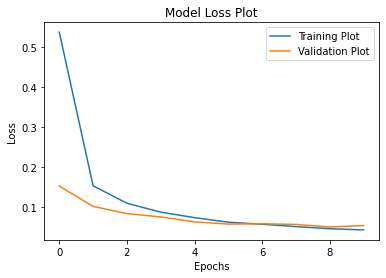

In [12]:
plt.plot(history.history['loss'], label = 'Training Plot')
plt.plot(history.history['val_loss'], label = 'Validation Plot')
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()